<a href="https://colab.research.google.com/github/ihsan292292/Settyl/blob/main/settyl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pandas
! pip install requests
! pip install matplotlib

In [2]:
import json
import requests
import pandas as pd

In [3]:
file_path = "https://gist.githubusercontent.com/farhaan-settyl/ecf9c1e7ab7374f18e4400b7a3d2a161/raw/f94652f217eeca83e36dab9d08727caf79ebdecf/dataset.json"

In [4]:
response = requests.get(file_path)
json_data = response.json()

In [5]:
unique_labels = set()
for entry in json_data:
  unique_labels.add(entry["internalStatus"])


In [6]:
unique_labels

{'Arrival',
 'Departure',
 'Empty Container Released',
 'Empty Return',
 'Gate In',
 'Gate Out',
 'In-transit',
 'Inbound Terminal',
 'Loaded on Vessel',
 'Off Rail',
 'On Rail',
 'Outbound Terminal',
 'Port In',
 'Port Out',
 'Unloaded on Vessel'}

In [7]:
import matplotlib.pyplot as plt

In [8]:
label_counts = {}
for entry in json_data:
    label = entry["internalStatus"]
    label_counts[label] = label_counts.get(label, 0) + 1

In [9]:
labels = list(label_counts.keys())
counts = list(label_counts.values())

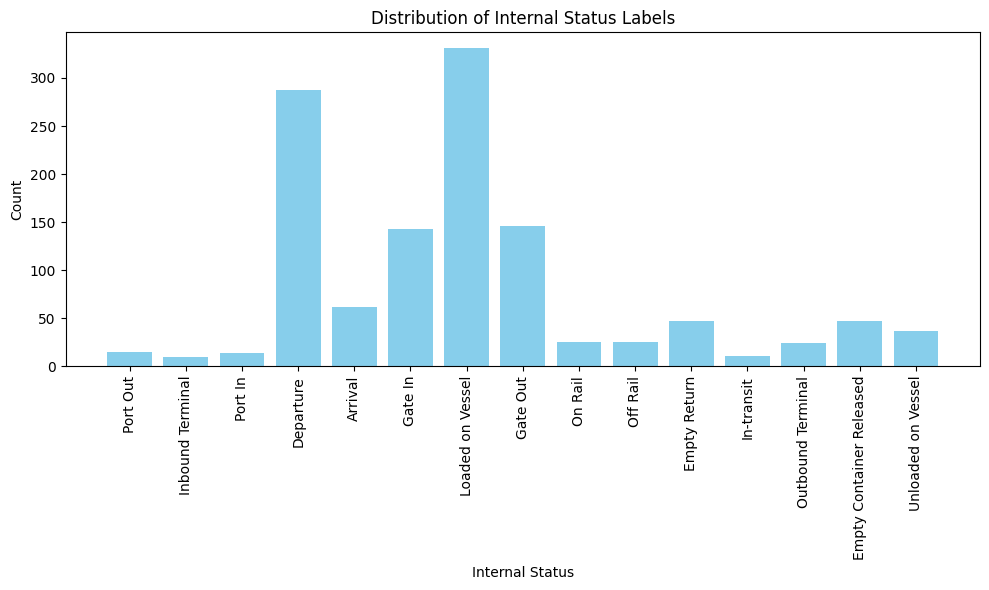

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Internal Status')
plt.ylabel('Count')
plt.title('Distribution of Internal Status Labels')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
df = pd.read_json(file_path)
df

,externalStatus,internalStatus
0,PORT OUT,Port Out
1,TERMINAL IN,Inbound Terminal
2,PORT IN,Port In
3,Vessel departure from first POL (Vessel name :...,Departure
4,Vessel arrival at final POD (Vessel name : TIA...,Arrival
...,...,...
1217,Import Loaded on Rail,Loaded on Vessel
1218,Full Transshipment Loaded,Loaded on Vessel
1219,Full Transshipment Loaded,Loaded on Vessel
1220,Export Loaded on Vessel,Loaded on Vessel


# Exploring Data

In [12]:
df['internalStatus'].value_counts()

internalStatus
Loaded on Vessel            331
Departure                   287
Gate Out                    146
Gate In                     143
Arrival                      62
Empty Return                 47
Empty Container Released     47
Unloaded on Vessel           37
On Rail                      25
Off Rail                     25
Outbound Terminal            24
Port Out                     15
Port In                      14
In-transit                   10
Inbound Terminal              9
Name: count, dtype: int64

In [13]:
df[df['internalStatus'] == 'Departure']['externalStatus'].value_counts()

externalStatus
Discharge                                                           141
Actual time of departure                                             50
DEPARTCU                                                             43
Expected time of departure                                           20
'MARINA ONE 001S' Departure from Port of Loading MARINA ONE 001S      9
Vessel Departure (Vessel name : VAYENGA MAERSK)                       7
Export Rail Departure                                                 6
Vessel Departure                                                      3
Vessel departure from first POL (Vessel name : TIAN FU HE)            1
Discharge (Vessel name : MSC ORION)                                   1
'YM PLUM 175W' Departure from Port of Loading YM PLUM 175W            1
'TUCAPEL 008E' Departure from Port of Loading TUCAPEL 008E            1
Discharge (Vessel name : COSCO INDONESIA)                             1
Discharge (Vessel name : MAERSK BULAN)           

In [14]:
df[df['internalStatus'] == 'Loaded on Vessel']['externalStatus'].value_counts()

externalStatus
Load on MAERSK SEMBAWANG / 237E                                   42
Load on MSC SVEVA / 248E                                          39
Full Transshipment Loaded                                         37
Loaded at First POL                                               30
Loaded at T/S POL                                                 30
Export Loaded on Vessel                                           23
Import Loaded on Rail                                             18
Load on MSC ORION / 227N                                          15
Loaded on 'MARINA ONE 001S' at Port of Loading MARINA ONE 001S     9
Loaded on Board                                                    8
Loaded on Train                                                    8
Loaded on board (Vessel name : VAYENGA MAERSK)                     7
Export Loaded on Rail                                              6
Load on MAERSK GUATEMALA / 247E                                    3
Loaded on board    

In [15]:
df[df['internalStatus'] == 'Gate Out']['externalStatus'].value_counts()

externalStatus
Gate out    144
GATE OUT      2
Name: count, dtype: int64

In [16]:
df[df['internalStatus'] == 'Gate In']['externalStatus'].value_counts()

externalStatus
Gate in    143
Name: count, dtype: int64

In [17]:
df[df['internalStatus'] == 'Arrival']['externalStatus'].value_counts()

externalStatus
'MARINA ONE 001S' Arrival at Port of Discharging MARINA ONE 001S    9
Expected Arrival Update                                             8
Rail Arrival in-Transit                                             8
Expected Arrival at Dest. Ramp                                      8
Expected Arrival Place of Delivery                                  8
Vessel Arrival (Vessel name : VAYENGA MAERSK)                       7
Vessel Arrival                                                      4
Estimated Time of Arrival                                           4
Train arrival for export                                            2
Vessel arrival at final POD (Vessel name : TIAN FU HE)              1
'YM PLUM 175W' Arrival at Port of Discharging YM PLUM 175W          1
Empty Container Door Arrival                                        1
'TUCAPEL 008E' Arrival at Port of Discharging TUCAPEL 008E          1
Name: count, dtype: int64

In [18]:
df[df['internalStatus'] == 'Empty Return']['externalStatus'].value_counts()

externalStatus
Gate out, Empty                           36
Empty Container Returned from Customer    11
Name: count, dtype: int64

In [19]:
df[df['internalStatus'] == 'Empty Container Released']['externalStatus'].value_counts()

externalStatus
Empty to Shipper                      25
Empty Container Release to Shipper    11
Empty to shipper                      11
Name: count, dtype: int64

In [20]:
df[df['internalStatus'] == 'On Rail']['externalStatus'].value_counts()

externalStatus
On rail    25
Name: count, dtype: int64

In [21]:
df[df['internalStatus'] == 'Off Rail']['externalStatus'].value_counts()

externalStatus
Off rail    25
Name: count, dtype: int64

In [22]:
df[df['internalStatus'] == 'Outbound Terminal']['externalStatus'].value_counts()

externalStatus
Gate In to Outbound Terminal    11
CFS OUT                          6
Gate In to Outbound CY           1
Outbound Rail Loading            1
Outbound Rail Departure          1
Outbound Rail Arrival            1
Outbound Rail Unloading          1
Gate Out from Outbound CY        1
TERMINAL OUT                     1
Name: count, dtype: int64

In [23]:
df[df['internalStatus'] == 'Port Out']['externalStatus'].value_counts()

externalStatus
PORT OUT    15
Name: count, dtype: int64

In [24]:
df[df['internalStatus'] == 'Port In']['externalStatus'].value_counts()

externalStatus
PORT IN    14
Name: count, dtype: int64

In [25]:
df[df['internalStatus'] == 'In-transit']['externalStatus'].value_counts()

externalStatus
TOLL PLAZA CROSSED    10
Name: count, dtype: int64

In [26]:
df[df['internalStatus'] == 'Inbound Terminal']['externalStatus'].value_counts()

externalStatus
CFS IN         7
TERMINAL IN    2
Name: count, dtype: int64

In [27]:
'''from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

tokenized_sentences = [word_tokenize(sentence) for sentence in df['externalStatus_clean']]
model = Word2Vec(sentences=tokenized_sentences, vector_size=20, window=5, min_count=1, workers=4)
sentence_vectors = [model.wv.get_vector(word) for sentence in tokenized_sentences for word in sentence]'''

"from gensim.models import Word2Vec\nfrom nltk.tokenize import word_tokenize\n\ntokenized_sentences = [word_tokenize(sentence) for sentence in df['externalStatus_clean']]\nmodel = Word2Vec(sentences=tokenized_sentences, vector_size=20, window=5, min_count=1, workers=4)\nsentence_vectors = [model.wv.get_vector(word) for sentence in tokenized_sentences for word in sentence]"

# Cleaning Text

In [28]:
import string
import re

def clean_text(input_string):
    # Regex that replaces punctuation with a blank space or empty string
    pattern = r'[{}]'.format(re.escape(string.punctuation))
    output_string = re.sub(pattern, ' ', input_string)
    return output_string.lower()

df['externalStatus_clean'] = df['externalStatus'].apply(clean_text)

# Model Building

In [29]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

2024-03-20 22:58:12.311424: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 22:58:12.318437: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 22:58:12.422484: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-20 22:58:13.717541: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [31]:
tokenizer = Tokenizer(oov_token="<UNK>", lower=True)
tokenizer.fit_on_texts(df['externalStatus_clean'])
sequences = tokenizer.texts_to_sequences(df['externalStatus_clean'])
maxlen = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, truncating="post", padding="post", maxlen=maxlen)

In [32]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(padded_sequences, df['internalStatus'])

In [33]:
X_res.shape, y_res.shape

((4965, 12), (4965,))

In [34]:
encoder = OneHotEncoder()
y = encoder.fit_transform(y_res.to_frame()).todense()
X_train, X_test, y_train, y_test = train_test_split(X_res, y, train_size=0.8, random_state=42)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

In [36]:
model1 = Sequential()
model1.add(Embedding(200, 16, input_shape=(maxlen,)))  # Adjust input_dim and output_dim as needed
model1.add(Bidirectional(LSTM(8, return_sequences=True)))
model1.add(Bidirectional(LSTM(8)))
model1.add(Dense(15, activation="softmax"))
model1.summary()

/home/ihsan/Desktop/settyl/Settyl/env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 12, 16)         │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 12, 16)         │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 16)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 15)             │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,655 (26.00 KB)

 Trainable params: 6,655 (26.00 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=12)

Epoch 1/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1158 - loss: 2.6336 - val_accuracy: 0.3273 - val_loss: 1.8065
Epoch 2/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6166 - loss: 1.4799 - val_accuracy: 0.8489 - val_loss: 0.8655
Epoch 3/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9162 - loss: 0.7639 - val_accuracy: 0.9648 - val_loss: 0.5388
Epoch 4/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9736 - loss: 0.4928 - val_accuracy: 0.9799 - val_loss: 0.3666
Epoch 5/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9814 - loss: 0.3503 - val_accuracy: 0.9799 - val_loss: 0.2786
Epoch 6/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9718 - loss: 0.2889 - val_accuracy: 0.9426 - val_loss: 0.3001
Epoch 7/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9687 - loss: 0.2589 - val_accuracy: 0.9819 - val_loss: 0.2044
Epoch 8/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9851 - loss: 0.1960 - val_accuracy: 0.

In [40]:
def predict_outcome(text):
    input_sequence = tokenizer.texts_to_sequences([clean_text(text)])
    padded_input_sequence = pad_sequences(input_sequence, truncating="post", padding="post", maxlen=maxlen) if len(input_sequence[0]) <= maxlen else pad_sequences([list(filter(lambda x: x != 1, input_sequence[0]))], truncating="post", padding="post", maxlen=maxlen)
    pred_index = model1.predict(padded_input_sequence, verbose=0)[0].argmax()
    return encoder.categories_[0][pred_index]

In [41]:
df['predictedInternalStatus'] = df['externalStatus'].apply(predict_outcome)

In [42]:
df

,externalStatus,internalStatus,externalStatus_clean,predictedInternalStatus
0,PORT OUT,Port Out,port out,Port Out
1,TERMINAL IN,Inbound Terminal,terminal in,Inbound Terminal
2,PORT IN,Port In,port in,Port In
3,Vessel departure from first POL (Vessel name :...,Departure,vessel departure from first pol vessel name ...,Departure
4,Vessel arrival at final POD (Vessel name : TIA...,Arrival,vessel arrival at final pod vessel name tia...,Arrival
...,...,...,...,...
1217,Import Loaded on Rail,Loaded on Vessel,import loaded on rail,Loaded on Vessel
1218,Full Transshipment Loaded,Loaded on Vessel,full transshipment loaded,Loaded on Vessel
1219,Full Transshipment Loaded,Loaded on Vessel,full transshipment loaded,Loaded on Vessel
1220,Export Loaded on Vessel,Loaded on Vessel,export loaded on vessel,Loaded on Vessel


In [43]:
(df['internalStatus'] == df['predictedInternalStatus']).value_counts()

True     1216
False       6
Name: count, dtype: int64

# Final Model training and exporting

In [47]:
import pickle
import tensorflow as tf

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)
    
tf.saved_model.save(model1, 'save')
print('Model Saved!')

INFO:tensorflow:Assets written to: save/assets


INFO:tensorflow:Assets written to: save/assets


Model Saved!


# Deployment

In [48]:
from keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import tensorflow as tf

In [52]:
pip install fastapi uvicorn

Note: you may need to restart the kernel to use updated packages.


In [70]:
from fastapi import FastAPI
import tensorflow as tf
import pickle
from pydantic import BaseModel
from fastapi import HTTPException
import re
import string

app = FastAPI()

# Load tokenizer and encoder
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

with open('encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)


# Load model
model = tf.saved_model.load(r'save')

# maxlen
sequences = tokenizer.texts_to_sequences(df['externalStatus_clean'])
maxlen = max([len(seq) for seq in sequences])

# Clean text function
def clean_text(input_string):
    pattern = r'[{}]'.format(re.escape(string.punctuation))
    output_string = re.sub(pattern, ' ', input_string)
    return output_string.lower()

infer = model.signatures["serving_default"]

def predict_outcome(text):
    input_sequence = tokenizer.texts_to_sequences([clean_text(text)])
    padded_input_sequence = pad_sequences(input_sequence, truncating="post", padding="post", maxlen=maxlen)
    padded_input_sequence_float = tf.cast(padded_input_sequence, dtype=tf.float32)  # Convert to float tensor
    outputs = model.signatures["serving_default"](tf.constant(padded_input_sequence_float))
    pred_index = tf.argmax(outputs['output_0'], axis=1).numpy()[0]
    return pred_index

# API request body model
class PredictionRequest(BaseModel):
    external_status: str

# API response model
class PredictionResponse(BaseModel):
    predicted_label: str

@app.post("/predict", response_model=PredictionResponse)
def predict(request: PredictionRequest):
    try:
        prediction_index = predict_outcome(request.external_status)
        predicted_label = encoder.categories_[0][prediction_index]
        return {"predicted_label": predicted_label}
    except Exception as e:
        # Log the error for debugging purposes
        print(f"An error occurred during prediction: {e}")
        # Raise HTTPException with 500 status code and error message
        raise HTTPException(status_code=500, detail="Internal Server Error")

ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-1' coro=<Server.serve() done, defined at /home/ihsan/Desktop/settyl/Settyl/env/lib/python3.10/site-packages/uvicorn/server.py:67> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/home/ihsan/Desktop/settyl/Settyl/env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_97401/34120991.py", line 6, in <module>
    uvicorn.run(app)
  File "/home/ihsan/Desktop/settyl/Settyl/env/lib/python3.10/site-packages/uvicorn/main.py", line 575, in run
    server.run()
  File "/home/ihsan/Desktop/settyl/Settyl/env/lib/python3.10/site-packages/uvicorn/server.py", line 65, in run
    return asyncio.run(self.serve(sockets=sockets))
  File "/home/ihsan/Desktop/settyl/Settyl/env/lib/python3.10/site-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
  File "/h

In [61]:
pip install pyngrok

  Using cached PyYAML-6.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (705 kB)
Note: you may need to restart the kernel to use updated packages.


In [74]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [75]:
# public url 
import nest_asyncio
import uvicorn
from pyngrok import ngrok
import os
from dotenv import load_dotenv

load_dotenv()
ngrok_auth_token = os.getenv("NGROK_AUTH_TOKEN")

ngrok.set_auth_token(ngrok_auth_token)
ngrok_tunnel = ngrok.connect(8000)

print('Public URL:', ngrok_tunnel.public_url)

nest_asyncio.apply()
uvicorn.run(app, port=8000)

Public URL: https://778f-150-129-101-209.ngrok-free.app


INFO:     Started server process [97401]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     150.129.101.209:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     150.129.101.209:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     150.129.101.209:0 - "POST /predict HTTP/1.1" 200 OK
